In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
weather = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'], index_col='Formatted Date')
weather.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [15]:
weather.index = pd.to_datetime(weather.index,utc=True)

weather.index

DatetimeIndex(['2006-03-31 22:00:00+00:00', '2006-03-31 23:00:00+00:00',
               '2006-04-01 00:00:00+00:00', '2006-04-01 01:00:00+00:00',
               '2006-04-01 02:00:00+00:00', '2006-04-01 03:00:00+00:00',
               '2006-04-01 04:00:00+00:00', '2006-04-01 05:00:00+00:00',
               '2006-04-01 06:00:00+00:00', '2006-04-01 07:00:00+00:00',
               ...
               '2016-09-09 12:00:00+00:00', '2016-09-09 13:00:00+00:00',
               '2016-09-09 14:00:00+00:00', '2016-09-09 15:00:00+00:00',
               '2016-09-09 16:00:00+00:00', '2016-09-09 17:00:00+00:00',
               '2016-09-09 18:00:00+00:00', '2016-09-09 19:00:00+00:00',
               '2016-09-09 20:00:00+00:00', '2016-09-09 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [16]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


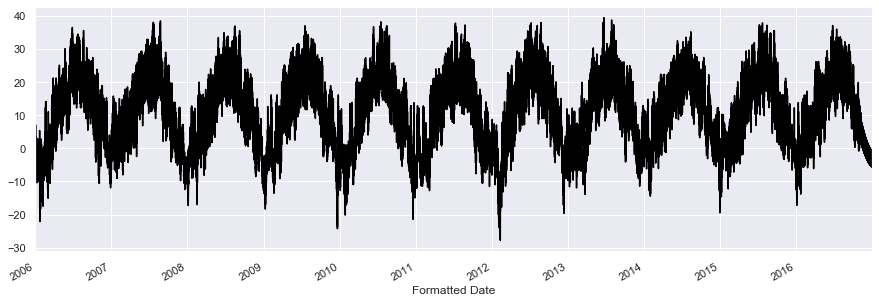

In [17]:

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 5)})

weather['Apparent Temperature (C)'].plot(color='black');
plt.show();

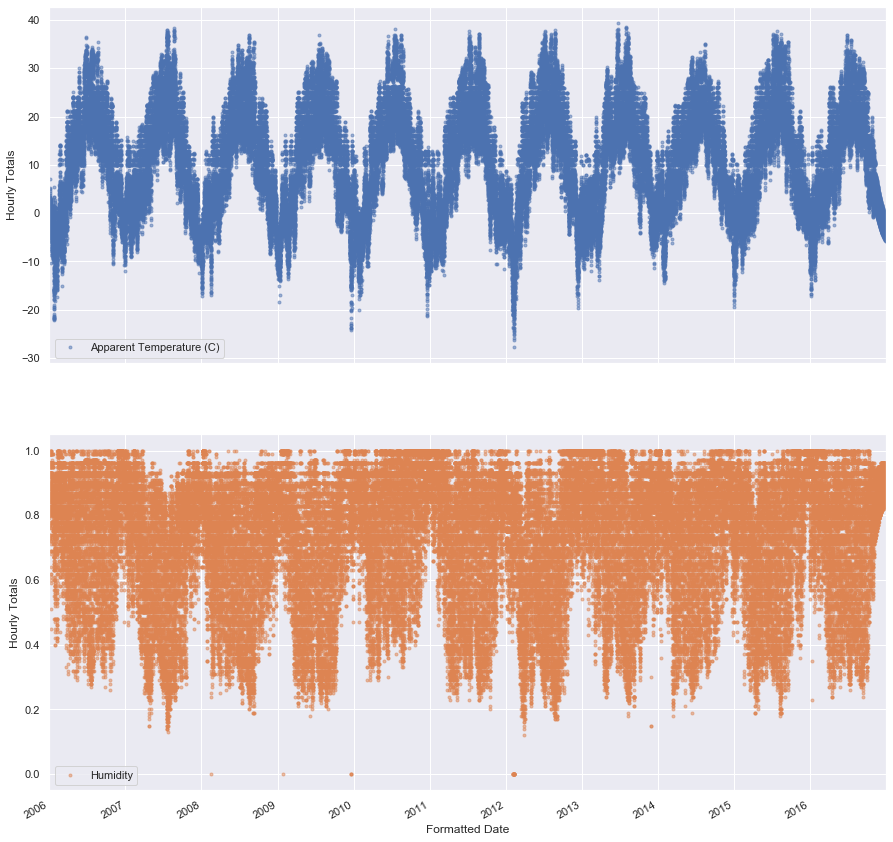

In [18]:
cols_plot = ['Apparent Temperature (C)', 'Humidity']

axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 16), subplots=True)
for ax in axes:
    ax.set_ylabel('Hourly Totals')

In [19]:
data_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']


# Resample to weekly frequency, aggregating with mean
weather_monthly_mean = weather[data_columns].resample('MS').mean()
weather_monthly_mean.tail(20)


,Temperature (C),Apparent Temperature (C),Humidity
Formatted Date,,,
2015-05-01 00:00:00+00:00,17.113881,17.067660,0.702742
2015-06-01 00:00:00+00:00,20.497986,20.511782,0.655208
2015-07-01 00:00:00+00:00,23.728920,23.803487,0.622984
2015-08-01 00:00:00+00:00,23.802300,23.745766,0.659825
2015-09-01 00:00:00+00:00,18.340023,18.308472,0.712889
2015-10-01 00:00:00+00:00,10.612761,10.170408,0.840524
2015-11-01 00:00:00+00:00,6.688773,5.553040,0.817014
2015-12-01 00:00:00+00:00,2.646438,0.828644,0.925390
2016-01-01 00:00:00+00:00,-0.109670,-3.014576,0.866156


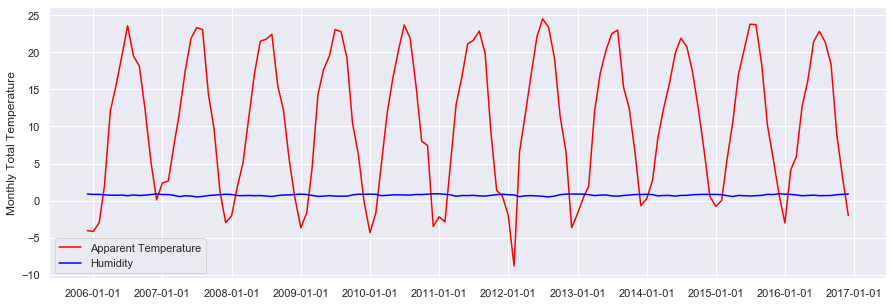

In [20]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
# ax.plot(weather_monthly_mean['Temperature (C)'], color='black', label='Temperature')

ax.plot(weather_monthly_mean['Apparent Temperature (C)'], color='red', label='Apparent Temperature')

ax.plot(weather_monthly_mean['Humidity'], color='blue', label='Humidity')

# weather_monthly_mean[['Apparent Temperature (C)', 'Humidity']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total Temperature');